# Ejercicio 3: Regresión logística vs Clasificador bayesiano ingenuo

#### Elaborado por: Dalia Yvette Domínguez Jiménez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler


## Importar y limpiar los datos

### breast-cancer-wisconsin.data

Leemos los datos del archivo:

In [2]:
df_cancer= pd.read_csv('breast-cancer-wisconsin.data')
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [3]:
df_cancer.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Agregamos los encabezados

In [4]:
headers=[]
with open("breast-cancer-wisconsin.names") as file:
    k = 0
    for line in file.readlines():
        k+=1
        if k>105 and k<117:
            headers.append(*re.findall('[A-Za-z]+ {0,1}[A-Za-z]+ {0,1}[A-Za-z]+ {0,1}[A-Za-z]+',line[6:35]))
df_cancer.columns=headers
df_cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


Visualizamos los datos faltantes

In [5]:
df_cancer[['Class']] = df_cancer[['Class']].replace(2,0)
df_cancer[['Class']] = df_cancer[['Class']].replace(4,1)
df_cancer[df_cancer[df_cancer.columns[6]]=='?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
22,1057013,8,4,5,1,2,?,7,3,1,1
39,1096800,6,6,6,9,6,?,7,8,1,0
138,1183246,1,1,1,1,1,?,2,1,1,0
144,1184840,1,1,3,1,2,?,2,1,1,0
157,1193683,1,1,2,1,3,?,1,1,1,0
163,1197510,5,1,1,1,2,?,3,1,1,0
234,1241232,3,1,4,1,2,?,3,1,1,0
248,169356,3,1,1,1,2,?,3,1,1,0
274,432809,3,1,3,1,2,?,2,1,1,0
291,563649,8,8,8,1,2,?,6,10,1,1


Imputamos los valores faltantes con la moda

In [6]:
imp = SimpleImputer(missing_values='?', strategy="most_frequent")
imp.fit(df_cancer[df_cancer.columns[[6]]])
df_cancer[df_cancer.columns[[6]]]=imp.transform(df_cancer[df_cancer.columns[[6]]])
df_cancer[df_cancer[df_cancer.columns[6]]=='?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class


Chequemos que todos los atributos sean de tipo entero:

In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
df_cancer=df_cancer.astype('int64')
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           698 non-null    int64
 1   Clump Thickness              698 non-null    int64
 2   Uniformity of Cell Size      698 non-null    int64
 3   Uniformity of Cell Shape     698 non-null    int64
 4   Marginal Adhesion            698 non-null    int64
 5   Single Epithelial Cell Size  698 non-null    int64
 6   Bare Nuclei                  698 non-null    int64
 7   Bland Chromatin              698 non-null    int64
 8   Normal Nucleoli              698 non-null    int64
 9   Mitoses                      698 non-null    int64
 10  Class                        698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


## spam.csv

In [9]:
data = []
with open("spam.csv",'r') as f:
    for line in f:
        data.append(line.split())
    f.close()

Considerando un histograma de palabras generado, excepto por el último dígito, que consideraremos $0=$ Legitimate y $1=$ spam.

In [10]:
header=['w'+str(i) for i in range(len(data[0])-1)] + ['Type']
df_spam = pd.DataFrame(data, columns=header)
df_spam.head()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1991,w1992,w1993,w1994,w1995,w1996,w1997,w1998,w1999,Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 2001 entries, w0 to Type
dtypes: object(2001)
memory usage: 79.0+ MB


### Validación cruzada con repetición

Definimos la función con la que validaremos nuestros modelos (definida en clase).

In [12]:
def vcrep_kpart(X, y, r=10, k=5):
    n = X.shape[0]
    t_pliegue = int(n / k)
    for i in range(r):
        perm = np.random.permutation(n)
        X = X[perm]
        y = y[perm]
        for j in range(k):
            masc_val = np.zeros(n, dtype=bool)
            masc_val[t_pliegue*j:t_pliegue*(j+1)] = True
            masc_ent = np.logical_not(masc_val)
            X_ent = X[masc_ent]
            y_ent = y[masc_ent]
            X_val = X[masc_val]
            y_val = y[masc_val]
      
            yield i, j, i * k + j, X_ent, y_ent, X_val, y_val

## Clasificadores

### Clasificador de datos de tumores

#### Clasificador bayesiano ingenuo categórico

Dividimos el conjunto de datos en entranamiento y prueba:

In [13]:
X_ent, X_pru, y_ent, y_pru = train_test_split(df_cancer.to_numpy()[:,1:-1],
                                              df_cancer.to_numpy()[:,-1],
                                              train_size=0.80, random_state=0)

Obtenemos el score para el conjunto de entrenamiento y de validación, con el método de validación cruzada con 5 particiones y 10 repeticiones:

In [14]:
score_nb = np.zeros((50,2))
for i,j,l,X_ent_vc,y_ent_vc,X_val_vc,y_val_vc in vcrep_kpart(X_ent,y_ent):
    cnb = CategoricalNB()
    cnb.fit(X_ent_vc, y_ent_vc) #Entrenar
    score_nb[l,0]=cnb.score(X_ent_vc,y_ent_vc) #Fraccion de predicciones correctas e incorrectas en cjto de entrenamiento
    score_nb[l,1]=cnb.score(X_val_vc,y_val_vc) #Fraccion de predicciones correctas e incorrectas en cjto de validación

Graficamos la presión promedio del conjunto de entrenamiento y de validación.

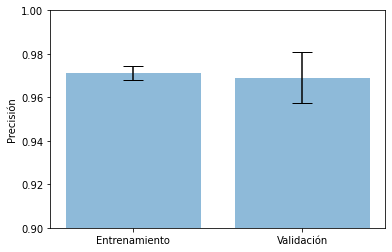

[0.9710962  0.96900901]


In [15]:
plt.bar( ['Entrenamiento','Validación'],score_nb.mean(axis=0), 
       yerr=score_nb.std(axis=0), align='center', 
       alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Precisión')
plt.ylim([0.9,1])
plt.show()
print(score_nb.mean(axis=0))

### Regresión logistica

Definimos la clase RegresionLogistica:

In [16]:
def entropia_cruzada(q, y):
    q[q==0] = np.nextafter(0,1)
    q[q==1] = np.nextafter(1,0)
    return np.sum(-np.log(q[np.nonzero(y)]))

def softmax(z):
    e_z = np.exp(z - np.max(z, axis = 1)[:, np.newaxis])
    norm = np.sum(e_z, axis = 1)
    return e_z / norm[:, np.newaxis]

def gradiente(X, Y, Q): 
    return X.T @  (Q - Y)

def descenso_gradiente(X, y, n_iter, tasa_ap):
    n_ej = X.shape[0]
    d = X.shape[1]
    n_clases = np.unique(y).size
  
      # Codifica clases con vectores 1-de-K
    Y_ohe = np.zeros((n_ej, n_clases))
    Y_ohe[np.arange(n_ej), y] = 1

  # Inicializa parámetros de forma aleatoria ("LeCun uniform")
    lim = np.sqrt(1 / d)
    parametros = np.random.uniform(-lim, lim, size=(d, n_clases))

    ecc = []
    for it in range(n_iter):
        Q = softmax(X @ parametros)
        parametros -= tasa_ap * gradiente(X, Y_ohe, Q)
        ecc.append(entropia_cruzada(Q, Y_ohe))

    return parametros, ecc

def exactitud(y, y_predicha):
    return (y == y_predicha).mean()

In [17]:
class RegLogMult:
    def fit(self, X, y, n_iter=1000, tasa_ap=0.001):
        self.parametros_, errores = descenso_gradiente(X, y, n_iter, tasa_ap)
        return errores

    def predict(self, X):
        return softmax(X @ self.parametros_)
  
    def score(self, X, y):
        q = self.predict(X)
        return exactitud(y, np.argmax(q, axis=1))

Cuando entrenamos modelos a través del descenso por gradiente, es importante que los valores de todas las dimensiones de los vectores de ejemplo se encuentren en rangos similares. Para lograr esto, en algunas ocasiones es necesario escalar los ejemplos. 

In [18]:
scaler = MinMaxScaler()
X_ent1 = scaler.fit_transform(X_ent)
X_pru1 = scaler.transform(X_pru)

Creamos la matriz de diseño para los conjuntos de entrenamiento y validación.

In [19]:
ones = np.ones((X_ent.shape[0], 1))
X_ent1 = np.column_stack((ones, X_ent))

ones = np.ones((X_pru.shape[0], 1))
X_pru1 = np.column_stack((ones, X_pru))

Instanciamos y entrenamos el modelo.

In [20]:
score_lr = np.zeros((50,2))
for i,j,l,X_ent_vc,y_ent_vc,X_val_vc,y_val_vc in vcrep_kpart(X_ent1,y_ent):
    rl=RegLogMult()
    rl.fit(X_ent1,y_ent)
    score_lr[l,0]=rl.score(X_ent_vc,y_ent_vc) #Fraccion de predicciones correctas e incorrectas en cjto de entrenamiento
    score_lr[l,1]=rl.score(X_val_vc,y_val_vc) #Fraccion de predic

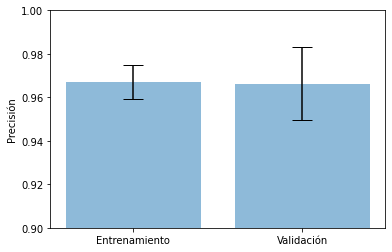

[0.96693512 0.96630631]


In [21]:
plt.bar( ['Entrenamiento','Validación'],score_lr.mean(axis=0), 
       yerr=score_lr.std(axis=0), align='center', 
       alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Precisión')
plt.ylim([0.9,1])
plt.show()
print(score_lr.mean(axis=0))

In [22]:
print(score_nb.mean(axis=0), score_nb.std(axis=0), '\n',
      score_lr.mean(axis=0), score_lr.std(axis=0))

[0.9710962  0.96900901] [0.00328303 0.01183717] 
 [0.96693512 0.96630631] [0.00772755 0.01669075]


### Clasificadores de spam

#### Clasificador bayesiano ingenuo multinomial

In [23]:
score_nb = np.zeros((50,2))
for i,j,l,X_ent_vc,y_ent_vc,X_val_vc,y_val_vc in vcrep_kpart(X_ent,y_ent):
    clf = MultinomialNB()
    clf.fit(X_ent, y_ent)
    score_nb[l,0]=clf.score(X_ent_vc,y_ent_vc) #Fraccion de predicciones correctas e incorrectas en cjto de entrenamiento
    score_nb[l,1]=clf.score(X_val_vc,y_val_vc) #Fraccion de predicciones correctas e incorrectas en cjto de validación

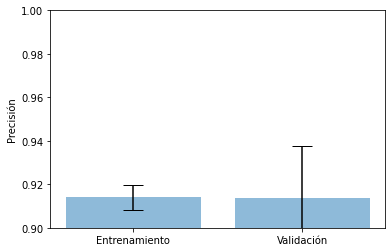

[0.91400447 0.91387387]


In [29]:
plt.bar( ['Entrenamiento','Validación'],score_nb.mean(axis=0), 
       yerr=score_nb.std(axis=0), align='center', 
       alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Precisión')
plt.ylim([0.9,1])
plt.show()
print(score_nb.mean(axis=0))

#### Regresión logistica multinomial

In [25]:
scaler = MinMaxScaler()
X_ent2 = scaler.fit_transform(X_ent)
X_pru2 = scaler.transform(X_pru)

In [26]:
ones = np.ones((X_ent.shape[0], 1))
X_ent2 = np.column_stack((ones, X_ent))

ones = np.ones((X_pru.shape[0], 1))
X_pru2 = np.column_stack((ones, X_pru))

In [27]:
score_lr = np.zeros((50,2))
for i,j,l,X_ent_vc,y_ent_vc,X_val_vc,y_val_vc in vcrep_kpart(X_ent2,y_ent):
    rl=RegLogMult()
    rl.fit(X_ent2,y_ent)
    score_lr[l,0]=rl.score(X_ent_vc,y_ent_vc) #Fraccion de predicciones correctas e incorrectas en cjto de entrenamiento
    score_lr[l,1]=rl.score(X_val_vc,y_val_vc) #Fraccion de predic

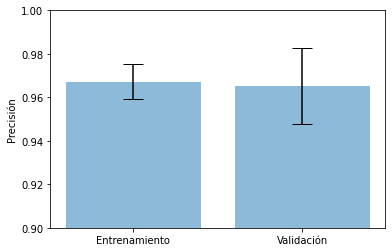

[0.96724832 0.96504505]


In [31]:
plt.bar( ['Entrenamiento','Validación'],score_lr.mean(axis=0), 
       yerr=score_lr.std(axis=0), align='center', 
       alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Precisión')
plt.ylim([0.9,1])
plt.show()
print(score_lr.mean(axis=0))

Se seleccionaría la regresión logistica multinomial pues esta tiene mejores resultados, en este caso no fue necesario recodificar el tipo de dato.